In [308]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [309]:
#load dataset
iris = sns.load_dataset('iris')

In [310]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [311]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [ ]:
# Initial Data Exploration.

In [312]:
iris.species.value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

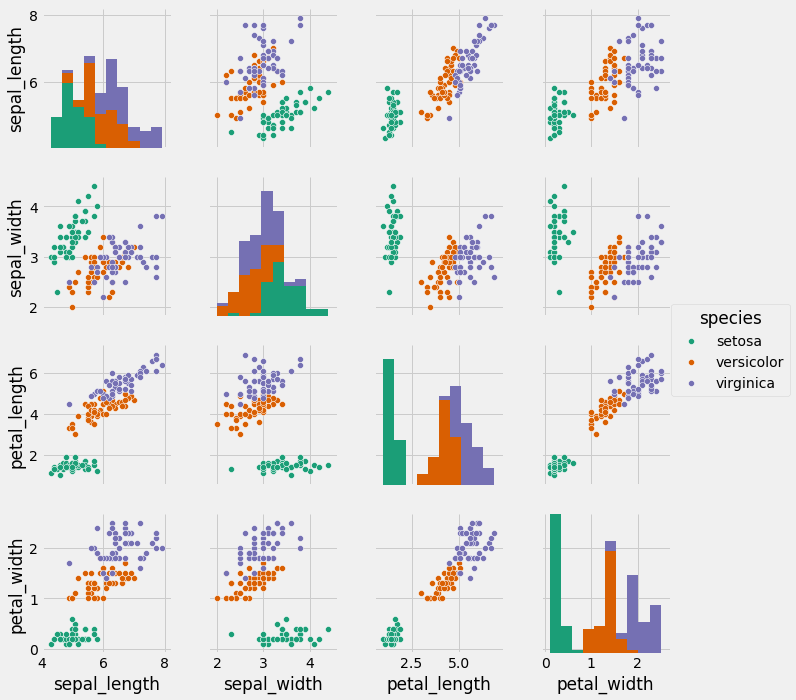

In [313]:
sns.pairplot(iris,hue='species',palette='Dark2')

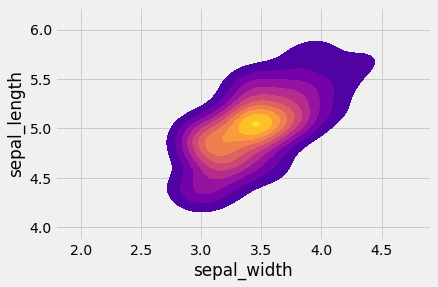

In [314]:
setosa = iris[iris['species']=='setosa']
sns.kdeplot( setosa['sepal_width'], setosa['sepal_length'],
                 cmap="plasma", shade=True, shade_lowest=False)

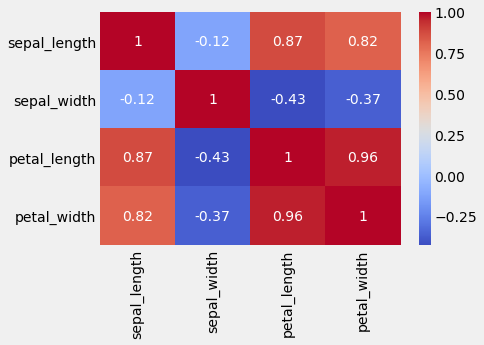

In [315]:
sns.heatmap(iris.corr(), cmap = 'coolwarm', annot = True)

In [316]:
from sklearn.model_selection import train_test_split

In [317]:
from sklearn import metrics #accuracy measure
from sklearn.metrics import classification_report,confusion_matrix

In [318]:
from sklearn.svm import SVC

In [319]:
X = iris.drop('species',axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [320]:
svc_model = SVC()

In [321]:
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [322]:
predictions = svc_model.predict(X_test)

In [323]:
print(confusion_matrix(y_test,predictions))

[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]


In [324]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        14
 versicolor       1.00      0.94      0.97        18
  virginica       0.93      1.00      0.96        13

avg / total       0.98      0.98      0.98        45



In [325]:
model=SVC(kernel = 'linear') 
model.fit(X_train,y_train)
prediction=model.predict(X_test)
metrics.accuracy_score(y_test,predictions)

0.97777777777777775

In [326]:
model=SVC(kernel = 'rbf') 
model.fit(X_train,y_train)
prediction=model.predict(X_test)
metrics.accuracy_score(y_test,predictions)

0.97777777777777775

In [327]:
model=SVC(kernel = 'sigmoid') 
model.fit(X_train,y_train)
prediction=model.predict(X_test)
metrics.accuracy_score(y_test,predictions)

0.97777777777777775

In [328]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.9444444444444444, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.9428571428571428, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.9705882352941176, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..................... C=0.1, gamma=0.1, score=0.75, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.7142857142857143, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.8235294117647058, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [329]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [330]:
grid.best_params_

{'C': 10, 'gamma': 0.01}

In [331]:
grid.best_score_

0.99047619047619051

In [332]:
grid_predictions = grid.predict(X_test)

In [333]:
print(confusion_matrix(y_test,grid_predictions))

[[14  0  0]
 [ 0 16  2]
 [ 0  0 13]]


In [335]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        14
 versicolor       1.00      0.89      0.94        18
  virginica       0.87      1.00      0.93        13

avg / total       0.96      0.96      0.96        45



In [ ]:
# not everytime the an acuuracy gets increased afetr cross validation. This happened because the datase was small